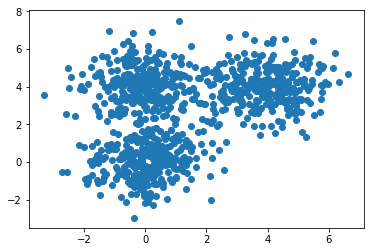

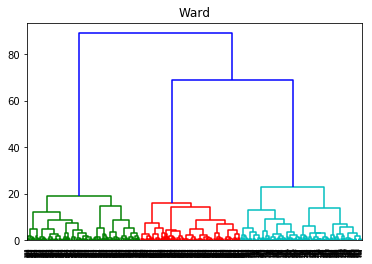

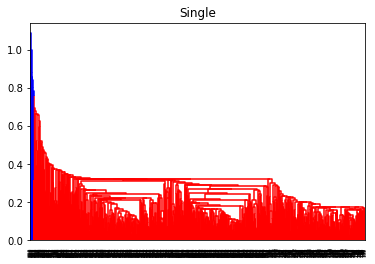

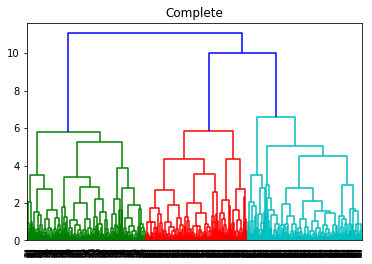

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

#creating random vectors of 3 distributions
D = 2 #dims
s = 4 #position of the distribution
mu1 = np.array([0,0]) #dist 1
mu2 = np.array([s,s]) #dist 2
mu3 = np.array([0,s]) #dist 3

N = 900
X = np.zeros((N, D))
X[:300, :] = np.random.randn(300, D) + mu1
X[300:600, :] = np.random.randn(300, D) + mu2
X[600:, :] = np.random.randn(300, D) + mu3

plt.scatter(X[:,0], X[:,1])
plt.show()

Z = linkage(X, 'ward')
plt.title("Ward")
dendrogram(Z)
plt.show()

Z = linkage(X, 'single')
plt.title("Single")
dendrogram(Z)
plt.show()

Z = linkage(X, 'complete')
plt.title("Complete")
dendrogram(Z)
plt.show()

## Using hierarchical clustering for evolution clustering ##

Finished creating generation 2 / 99, size = 9
Finished creating generation 3 / 99, size = 22
Finished creating generation 4 / 99, size = 46
Finished creating generation 5 / 99, size = 104
Finished creating generation 6 / 99, size = 216
Finished creating generation 7 / 99, size = 417
Finished creating generation 8 / 99, size = 852
Finished creating generation 9 / 99, size = 1000
Finished creating generation 10 / 99, size = 1000
Finished creating generation 11 / 99, size = 1000
Finished creating generation 12 / 99, size = 1000
Finished creating generation 13 / 99, size = 1000
Finished creating generation 14 / 99, size = 1000
Finished creating generation 15 / 99, size = 1000
Finished creating generation 16 / 99, size = 1000
Finished creating generation 17 / 99, size = 1000
Finished creating generation 18 / 99, size = 1000
Finished creating generation 19 / 99, size = 1000
Finished creating generation 20 / 99, size = 1000
Finished creating generation 21 / 99, size = 1000
Finished creating g

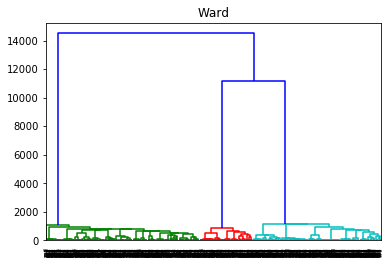

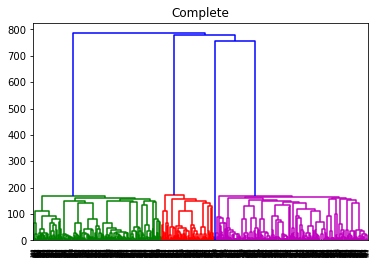

In [9]:
import random
import scipy.spatial.distance as ssd

#the genetic code
code = ['A', 'T', 'C', 'G']

#convert array of numbers for its corresponding letters
def to_code(a):
    return [code[i] for i in a]

# distance between 2 DNA strands
def dist(a, b):
    return sum(i != j for i, j in zip(a,b))

#generate offspring by modifying some characters in the code
def generate_offspring(parent):
    return [maybe_modify(c) for c in parent]

def maybe_modify(c):
    if np.random.random() < 0.001:
        return np.random.choice(code)
    return c

# create 3 distinct ancestors
p1 = to_code(np.random.randint(4, size=1000))
p2 = to_code(np.random.randint(4, size=1000))
p3 = to_code(np.random.randint(4, size=1000))

#create offspring
num_generations = 99
max_offspring_per_generation = 1000
current_generation = [p1, p2, p3]
for i in range(num_generations):
    
    next_generation = []
    for parent in current_generation:
        #each parent will have between 1 and 3 children
        num_offspring = np.random.randint(3) + 1
        
        #generate the offspring
        for _ in range(num_offspring):
            child = generate_offspring(parent)
            next_generation.append(child)
        
    current_generation = next_generation
    
    #limite the number of offspring
    random.shuffle(current_generation)
    current_generation = current_generation[:max_offspring_per_generation]
    
    print("Finished creating generation %d / %d, size = %d" %(i + 2, num_generations, len(current_generation)))
   
#create distance matrix
#note: you can also use scipy's pdist for this, but not sklearn's pairwise_distances function which does not return
#a symmetrix matrix
N = len(current_generation)
dist_matrix = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i == j:
            continue
        elif j > 1:
            a = current_generation[i]
            b = current_generation[j]
            dist_matrix[i,j] = dist(a,b)
        else:
            dist_matrix[i,j] = dist_matrix[j,i]
            
dist_array = ssd.squareform(dist_matrix)

Z = linkage(dist_array, 'ward')
plt.title("Ward")
dendrogram(Z)
plt.show()

Z = linkage(dist_array, 'complete')
plt.title("Complete")
dendrogram(Z)
plt.show()